## You can treate any data by using this notebook (just change the file name) ,

### we suppose that the target value is in the last column, 

### and this is a binary classification problem, 

### and we do not lose any data.
### I have tried adult.csv and banknote.csv, 


### In this notebook, we need only to change the datafile (and the data preprocessing and the part of learning model, if you want)

### In the data preprocessing, we can add some steps like standardization/normalization of data, converting the nominal variable to numeric variable, of course we need more details of the data

### And some problems(the plot of tree, scatter matrix, force plot of shap) may happen because the data size is too large, in that case, you need to sample it.


## read data

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('banknote.csv', encoding='latin')
print('Shape before deleting duplicate values:', data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(10)

Shape before deleting duplicate values: (1372, 5)


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,1.0
1,4.54590,8.1674,-2.45860,-1.46210,1.0
2,3.86600,-2.6383,1.92420,0.10645,1.0
3,3.45660,9.5228,-4.01120,-3.59440,1.0
4,0.32924,-4.4552,4.57180,-0.98880,1.0
5,4.36840,9.6718,-3.96060,-3.16250,1.0
6,3.59120,3.0129,0.72888,0.56421,1.0
7,2.09220,-6.8100,8.46360,-0.60216,1.0
8,3.20320,5.7588,-0.75345,-0.61251,1.0
9,1.53560,9.1772,-2.27180,-0.73535,1.0


In [2]:
feature_names=np.array(data.columns)[:-1]
target=data.columns[-1]
Nfeatures=len(feature_names)

print(feature_names)
print(target)
print(Nfeatures)


['variance of Wavelet' 'skewness of Wavelet' 'curtosis of Wavelet'
 'entropy']
class
4


## data preprocessing

### remove duplicate

In [3]:

# Removing duplicate rows if any
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)



Shape After deleting duplicate values: (1348, 5)


### find continous and categorical features

In [4]:
Continousfeatures=[]
Categoricalfeatures=[]

In [5]:
a=data.nunique()


for i in range(Nfeatures):
    if a[i]>30:
        Continousfeatures.append(feature_names[i])
    else:
        Categoricalfeatures.append(feature_names[i])

print(Continousfeatures)
print(Categoricalfeatures)

['variance of Wavelet', 'skewness of Wavelet', 'curtosis of Wavelet', 'entropy']
[]


### remove the feature not relevant with the target

In [6]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [7]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables= Continousfeatures
feature_continous_relevant= FunctionAnova(inpData= data, TargetVariable= target, ContinuousPredictorList=ContinuousVariables)


##### ANOVA Results ##### 

variance of Wavelet is correlated with class | P-Value: 1.5506820757442361e-229
skewness of Wavelet is correlated with class | P-Value: 4.0023563330687506e-68
curtosis of Wavelet is correlated with class | P-Value: 1.2203203353000528e-08
entropy is NOT correlated with class | P-Value: 0.2124927498883946


In [8]:
feature_continous_relevant

['variance of Wavelet', 'skewness of Wavelet', 'curtosis of Wavelet']

In [9]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [10]:
CategoricalVariables= Categoricalfeatures

# Calling the function
feature_categorical_relevant=FunctionChisq(inpData= data, 
              TargetVariable= target,
              CategoricalVariablesList= CategoricalVariables)


In [11]:
feature_categorical_relevant

[]

### After removing useless data, we get the new dataframe

In [12]:
Feature_names=[]

for i in feature_categorical_relevant:
    Feature_names.append(i)
for i in feature_continous_relevant:
    Feature_names.append(i)

print(Feature_names)   

Nfeatures=len(Feature_names)
print(Nfeatures)
    
Data=pd.DataFrame()

for i in Feature_names:
    Data[i]=data[i]

Data[target]=data[target]
    
Data.head(10)

['variance of Wavelet', 'skewness of Wavelet', 'curtosis of Wavelet']
3


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,class
0,3.62160,8.6661,-2.80730,1.0
1,4.54590,8.1674,-2.45860,1.0
2,3.86600,-2.6383,1.92420,1.0
3,3.45660,9.5228,-4.01120,1.0
4,0.32924,-4.4552,4.57180,1.0
5,4.36840,9.6718,-3.96060,1.0
6,3.59120,3.0129,0.72888,1.0
7,2.09220,-6.8100,8.46360,1.0
8,3.20320,5.7588,-0.75345,1.0
9,1.53560,9.1772,-2.27180,1.0


## use model （choose whatever you want）, I use decision tree here

In [13]:

from sklearn import tree
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Data,test_size=0.2,random_state=428)

X_train_set=train_set[Feature_names].values
y_train_set=train_set[target].values
X_test_set=train_set[Feature_names].values
y_test_set=train_set[target].values

X=Data[Feature_names].values
y=Data[target].values

#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

## YOU need to change MAX_DEPTH , CRITERION  here maybe, for specifical problem

## max_depth,      
## criterion{“gini”, “entropy”}, default=”gini”
## min_samples_splitint or float, default=2   :The minimum number of samples required to split an internal node:
## min_samples_leafint or float, default=1:
##   The minimum number of samples required to be at a leaf node. 
##   A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train_set,y_train_set)
prediction=DTree.predict(X_test_set)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_set, prediction))
print(metrics.confusion_matrix(y_test_set, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_set, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       589
         2.0       0.99      0.99      0.99       489

    accuracy                           0.99      1078
   macro avg       0.99      0.99      0.99      1078
weighted avg       0.99      0.99      0.99      1078

[[582   7]
 [  6 483]]
Accuracy of the model on Testing Sample Data: 0.99

Accuracy values for 10-fold Cross Validation:
 [0.97781456 0.97042916 0.94036257 0.95560956 0.97042916 0.94810788
 0.97779253 0.97781456 0.97764576 0.95522388]

Final Average Accuracy of the model: 0.97


<AxesSubplot:>

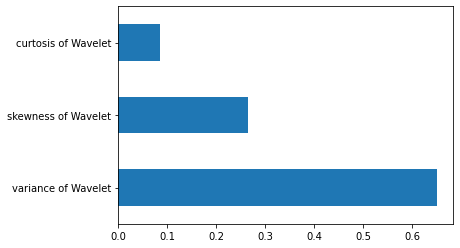

In [14]:
import matplotlib.pyplot as plt

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Feature_names)
feature_importances.nlargest(10).plot(kind='barh')



In [15]:
from sklearn.tree import export_text

r = export_text(clf, feature_names=Feature_names)
    
print(r)  

|--- variance of Wavelet <= 0.71
|   |--- skewness of Wavelet <= 5.16
|   |   |--- curtosis of Wavelet <= 3.05
|   |   |   |--- class: 2.0
|   |   |--- curtosis of Wavelet >  3.05
|   |   |   |--- skewness of Wavelet <= -1.73
|   |   |   |   |--- class: 2.0
|   |   |   |--- skewness of Wavelet >  -1.73
|   |   |   |   |--- class: 1.0
|   |--- skewness of Wavelet >  5.16
|   |   |--- variance of Wavelet <= -3.44
|   |   |   |--- class: 2.0
|   |   |--- variance of Wavelet >  -3.44
|   |   |   |--- class: 1.0
|--- variance of Wavelet >  0.71
|   |--- curtosis of Wavelet <= -4.46
|   |   |--- skewness of Wavelet <= 7.02
|   |   |   |--- class: 2.0
|   |   |--- skewness of Wavelet >  7.02
|   |   |   |--- class: 1.0
|   |--- curtosis of Wavelet >  -4.46
|   |   |--- variance of Wavelet <= 1.59
|   |   |   |--- curtosis of Wavelet <= -2.29
|   |   |   |   |--- class: 2.0
|   |   |   |--- curtosis of Wavelet >  -2.29
|   |   |   |   |--- class: 1.0
|   |   |--- variance of Wavelet >  1.59
| 

C:\bonjour\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


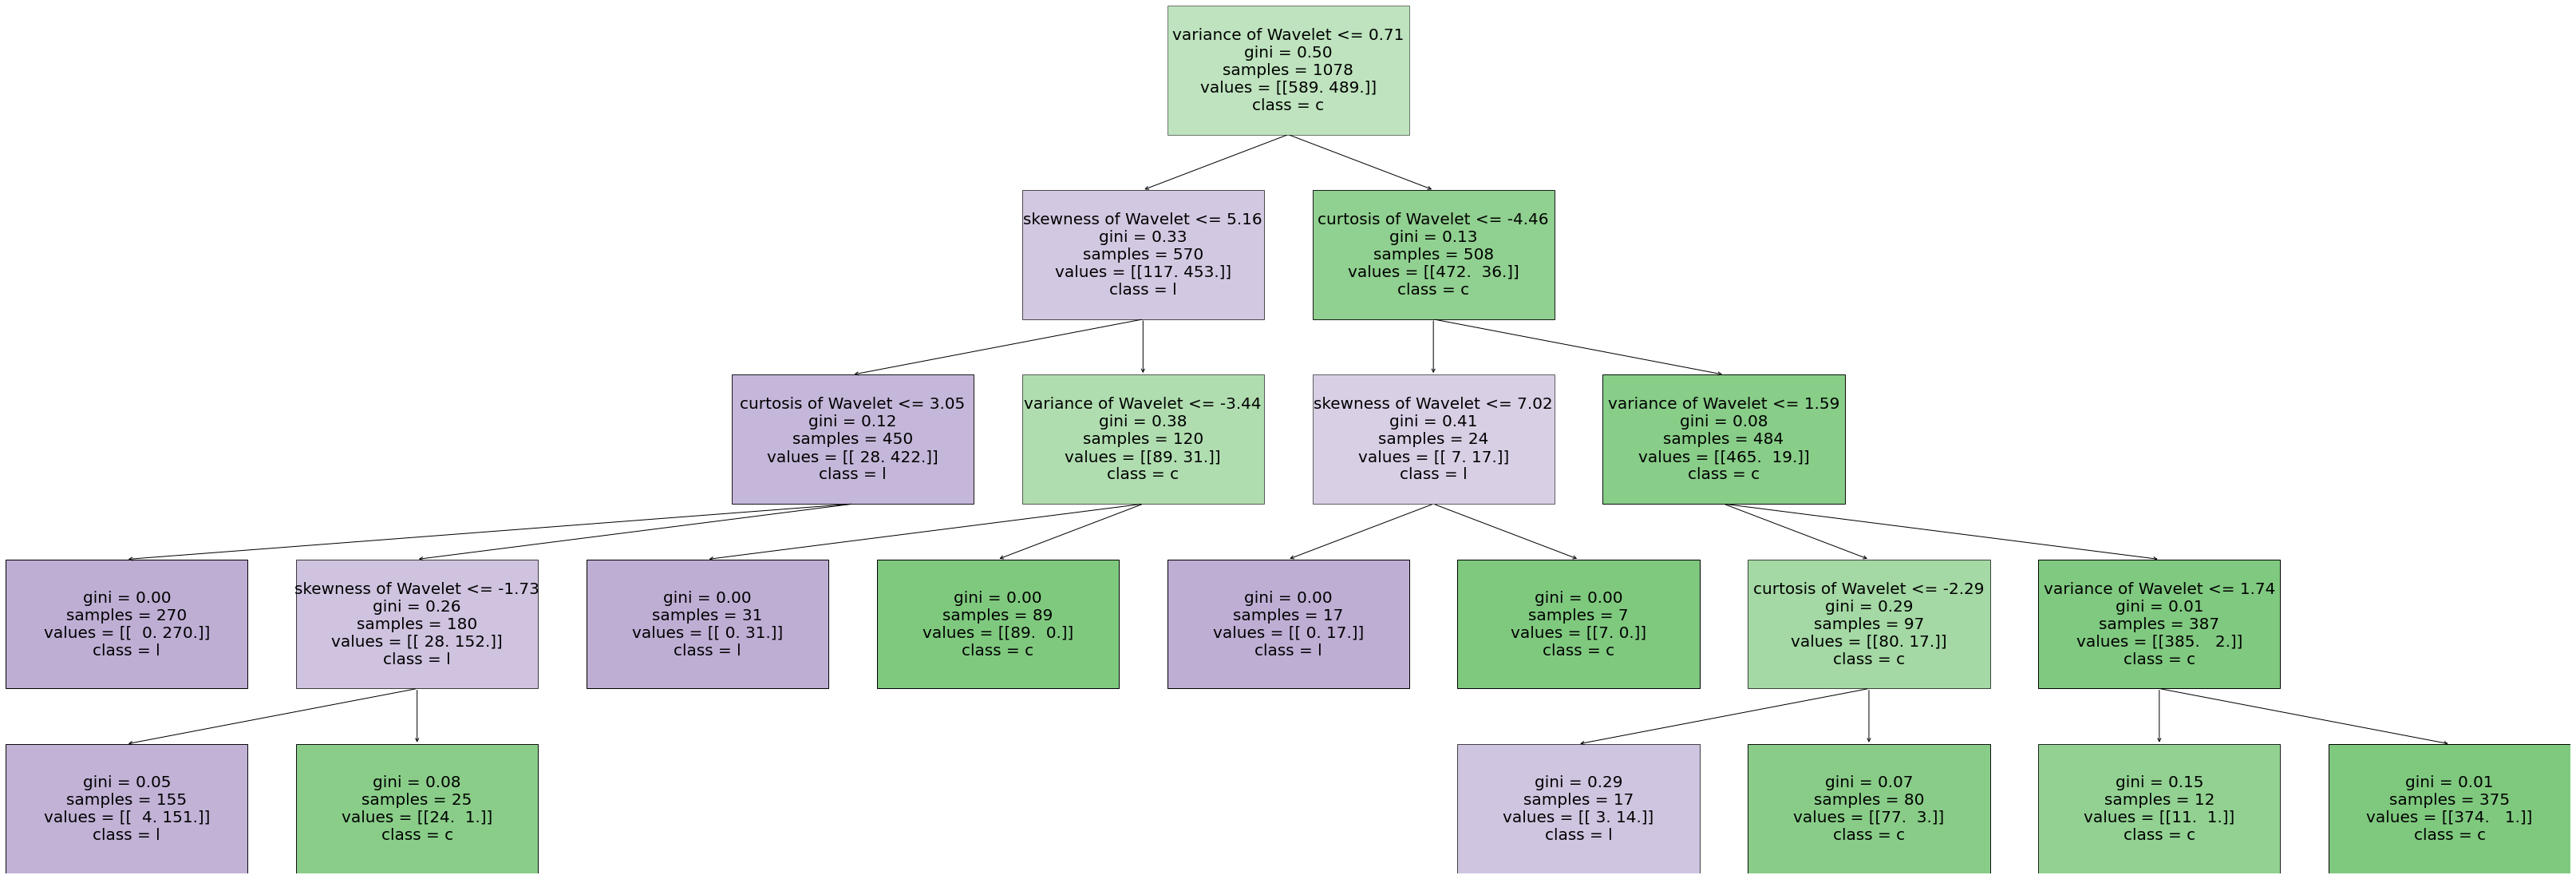

In [16]:
## IF the tree is too big, this will fail

from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Feature_names, target_names=target)
fig = dtree.view()

## SHAP

### Below, we only consider the data in the training set

In [17]:
import shap


## delete the column of y

a=train_set.drop(labels= target ,axis=1)

a.head()



,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet
323,3.88400,10.0277,-3.92980
1290,0.11032,1.9741,-3.36680
994,-0.87340,1.6533,-2.19640
1077,-1.60010,-9.5828,9.40440
929,-3.91720,2.6652,0.78886


In [18]:
explainer = shap.Explainer(DTree, a)

## Because we use DTree to learn, you need to change it if you use other learning model

In [19]:
shap_values = explainer(a)


In [20]:
shap_values

.values =
array([[[ 0.30400874, -0.30400874],
        [ 0.18709893, -0.18709893],
        [-0.03442225,  0.03442225]],

       [[-0.28989407,  0.28989407],
        [-0.05044301,  0.05044301],
        [-0.20031085,  0.20031085]],

       [[-0.32526539,  0.3252654 ],
        [-0.05044301,  0.05044301],
        [-0.16493952,  0.16493953]],

       ...,

       [[ 0.42751054, -0.42751055],
        [-0.07447957,  0.07447957],
        [ 0.10365445, -0.10365445]],

       [[ 0.30400874, -0.30400874],
        [ 0.18709893, -0.18709893],
        [-0.03442225,  0.03442225]],

       [[-0.32526539,  0.3252654 ],
        [-0.05044301,  0.05044301],
        [-0.16493952,  0.16493953]]])

.base_values =
array([[0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       ...,
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207]])

.data =
array([[ 3.884  , 10.0277 , -3.9298 ],
       [ 0.11032,  1.9741 , -3.3668 ],
   

### because this is a binary classification problem, we get two shapley values for each feature of each observation,but  we need only one.

In [21]:
shap_values2=shap_values.values[:,:,0]

In [22]:
shap_values2

array([[ 0.30400874,  0.18709893, -0.03442225],
       [-0.28989407, -0.05044301, -0.20031085],
       [-0.32526539, -0.05044301, -0.16493952],
       ...,
       [ 0.42751054, -0.07447957,  0.10365445],
       [ 0.30400874,  0.18709893, -0.03442225],
       [-0.32526539, -0.05044301, -0.16493952]])

### we make a new dataframe with both feature value and shap value

In [23]:
DatawithSHAP = a.copy()


for i in range(Nfeatures):
    DatawithSHAP['shap '+str(i)]=shap_values2[:,i]

DatawithSHAP[target] = train_set[target]

In [24]:
## because we dissarange the data in the split of training/test data, we need to renew the index(for beautiful)

DatawithSHAP.index=[i for i in range(len(train_set))]
DatawithSHAP.head(10)

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,shap 0,shap 1,shap 2,class
0,3.88400,10.0277,-3.929800,0.304009,0.187099,-0.034422,1.0
1,0.11032,1.9741,-3.366800,-0.289894,-0.050443,-0.200311,2.0
2,-0.87340,1.6533,-2.196400,-0.325265,-0.050443,-0.164940,2.0
3,-1.60010,-9.5828,9.404400,-0.312018,-0.348447,0.145624,2.0
4,-3.91720,2.6652,0.788860,-0.455265,0.079557,-0.164940,2.0
5,2.98560,7.2673,-0.409000,0.268637,0.187099,0.000949,1.0
6,-2.57010,-6.8452,8.999900,-0.312018,-0.348447,0.145624,2.0
7,-2.21530,11.9625,0.078538,-0.057799,0.536624,-0.019473,1.0
8,1.15880,8.9331,-2.080700,0.191269,0.187099,0.043484,1.0
9,-0.89809,-4.4862,2.200900,-0.343949,-0.176559,-0.020140,2.0


array([[<AxesSubplot:xlabel='variance of Wavelet', ylabel='variance of Wavelet'>,
        <AxesSubplot:xlabel='skewness of Wavelet', ylabel='variance of Wavelet'>,
        <AxesSubplot:xlabel='curtosis of Wavelet', ylabel='variance of Wavelet'>,
        <AxesSubplot:xlabel='shap 0', ylabel='variance of Wavelet'>,
        <AxesSubplot:xlabel='shap 1', ylabel='variance of Wavelet'>,
        <AxesSubplot:xlabel='shap 2', ylabel='variance of Wavelet'>],
       [<AxesSubplot:xlabel='variance of Wavelet', ylabel='skewness of Wavelet'>,
        <AxesSubplot:xlabel='skewness of Wavelet', ylabel='skewness of Wavelet'>,
        <AxesSubplot:xlabel='curtosis of Wavelet', ylabel='skewness of Wavelet'>,
        <AxesSubplot:xlabel='shap 0', ylabel='skewness of Wavelet'>,
        <AxesSubplot:xlabel='shap 1', ylabel='skewness of Wavelet'>,
        <AxesSubplot:xlabel='shap 2', ylabel='skewness of Wavelet'>],
       [<AxesSubplot:xlabel='variance of Wavelet', ylabel='curtosis of Wavelet'>,
        <A

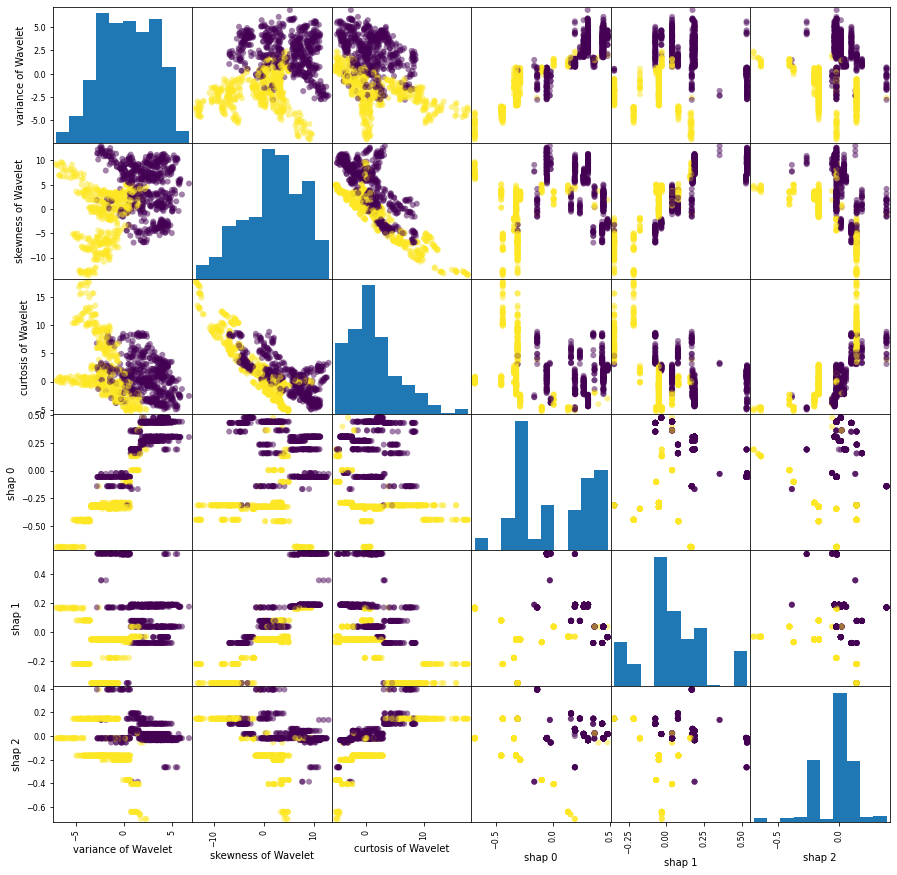

In [25]:
newdata = DatawithSHAP.copy()
newdata.drop(labels=target,axis=1,inplace=True)

pd.plotting.scatter_matrix(newdata, c=DatawithSHAP[target], figsize=(15,15),marker='o')

## we can use the whole data   newdata, DatawhithSHAP[target]. But it may be too slow if the data has too large size


### some plot of shap

### waterfall

In [26]:
## because the function waterfall_plot()

class helper_object():
    """
    This wraps the shap object.
    It takes as input i, which indicates the index of the observation to be explained.
    """
    def __init__(self, i):
        self.base_values = shap_values.base_values[i][0]
        self.data = a.iloc[i]
        self.feature_names = a.columns.to_list()
        self.values = []
        for j in range(Nfeatures):
            self.values.append(shap_values.values[i][j][0])
        self.values= np.array(self.values)

print(helper_object(0).values)  
print(helper_object(0).data)
print(helper_object(0).base_values)
print(helper_object(0).feature_names)

[ 0.30400874  0.18709893 -0.03442225]
variance of Wavelet     3.8840
skewness of Wavelet    10.0277
curtosis of Wavelet    -3.9298
Name: 323, dtype: float64
0.5406479316888039
['variance of Wavelet', 'skewness of Wavelet', 'curtosis of Wavelet']


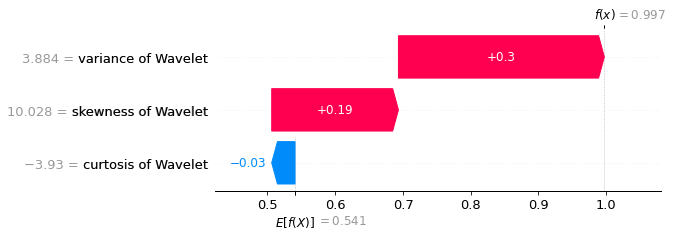

In [27]:

## waterfall plot of the ith observation
i=0

shap.waterfall_plot(helper_object(i), len(shap_values[i]))


### scatter

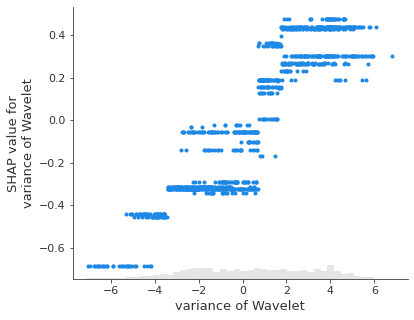

In [28]:
## make the scatter plot of the ith feature

i=0

shap.plots.scatter(shap_values[:,0,i])   


### beeswarm

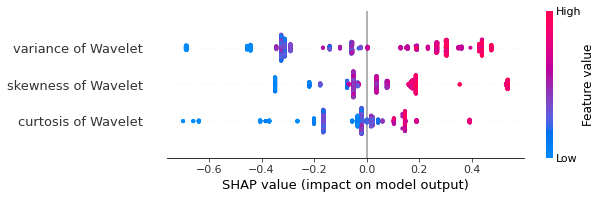

In [29]:
shap.summary_plot(shap_values2, a)

## a is defined before, in the beginning of the SHAP section


### bar

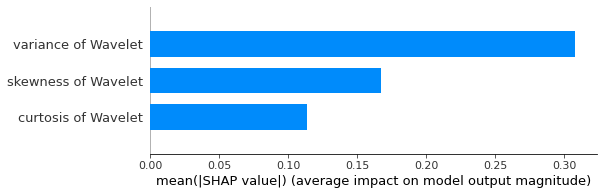

In [30]:
shap.summary_plot(shap_values2,a,plot_type="bar")

### force

In [31]:
shap.initjs()


In [32]:
### we can use the whole data shap_values2, but it may be very slow if the data has too large size

shap.plots.force(explainer.expected_value[0],shap_values2[:1000],feature_names=  Feature_names)

## Clustering

### k-means

### we choose 2 most important features to make the cluster

In [33]:
s=[]

for i in range(Nfeatures):
    s.append(round(sum(abs(shap_values2[:,i]))))

b=pd.Series(s).sort_values(ascending = False)

feature1=Feature_names[s.index(b.values[0])]
feature2=Feature_names[s.index(b.values[1])]

shapfeature1= 'shap '+str(s.index(b.values[0]))
shapfeature2= 'shap '+str(s.index(b.values[1]))

print(s)

print(feature1, shapfeature1)
print(feature2, shapfeature2)


[332, 180, 123]
variance of Wavelet shap 0
skewness of Wavelet shap 1


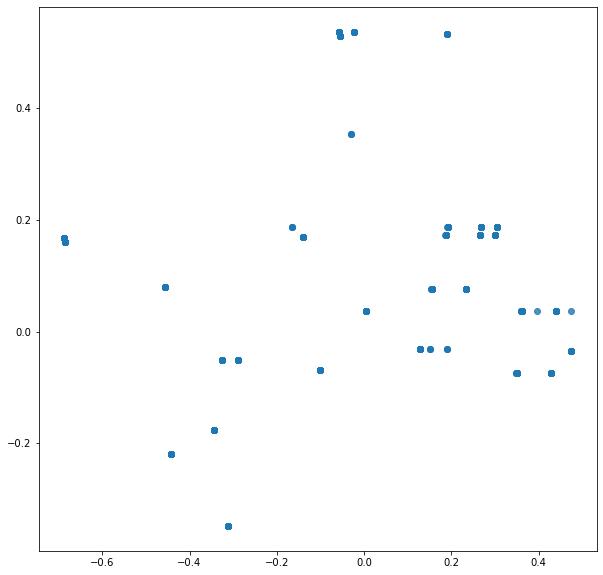

In [34]:

plt.figure(figsize=(10,10))
plt.scatter(DatawithSHAP[shapfeature1],DatawithSHAP[shapfeature2],alpha=0.8)
## alpha means the transparence , many points overlaps here in fact
plt.show()

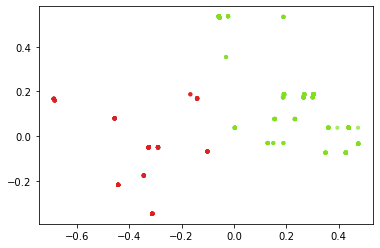

In [35]:
df=DatawithSHAP.copy()


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)



df['cluster']=kmeans.fit_predict(df[[shapfeature1,shapfeature2]])

colors = ['#DF2020', '#81DF20']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1]})

plt.scatter(df[shapfeature1],df[shapfeature2], c=df.c, alpha = 0.6, s=10)

In [36]:
df.head(10)

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,shap 0,shap 1,shap 2,class,cluster,c
0,3.88400,10.0277,-3.929800,0.304009,0.187099,-0.034422,1.0,1,#81DF20
1,0.11032,1.9741,-3.366800,-0.289894,-0.050443,-0.200311,2.0,0,#DF2020
2,-0.87340,1.6533,-2.196400,-0.325265,-0.050443,-0.164940,2.0,0,#DF2020
3,-1.60010,-9.5828,9.404400,-0.312018,-0.348447,0.145624,2.0,0,#DF2020
4,-3.91720,2.6652,0.788860,-0.455265,0.079557,-0.164940,2.0,0,#DF2020
5,2.98560,7.2673,-0.409000,0.268637,0.187099,0.000949,1.0,1,#81DF20
6,-2.57010,-6.8452,8.999900,-0.312018,-0.348447,0.145624,2.0,0,#DF2020
7,-2.21530,11.9625,0.078538,-0.057799,0.536624,-0.019473,1.0,1,#81DF20
8,1.15880,8.9331,-2.080700,0.191269,0.187099,0.043484,1.0,1,#81DF20
9,-0.89809,-4.4862,2.200900,-0.343949,-0.176559,-0.020140,2.0,0,#DF2020


In [45]:
dff=df.copy()
dff.drop(labels='c',axis=1,inplace=True)


for i in range(len(df)):
    if df['cluster'][i]==0:
        dff.iloc[i,-1]=2

dff['prediction']=prediction

dff.head(10)


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,shap 0,shap 1,shap 2,class,cluster,prediction
0,3.88400,10.0277,-3.929800,0.304009,0.187099,-0.034422,1.0,1,1.0
1,0.11032,1.9741,-3.366800,-0.289894,-0.050443,-0.200311,2.0,2,2.0
2,-0.87340,1.6533,-2.196400,-0.325265,-0.050443,-0.164940,2.0,2,2.0
3,-1.60010,-9.5828,9.404400,-0.312018,-0.348447,0.145624,2.0,2,2.0
4,-3.91720,2.6652,0.788860,-0.455265,0.079557,-0.164940,2.0,2,2.0
5,2.98560,7.2673,-0.409000,0.268637,0.187099,0.000949,1.0,1,1.0
6,-2.57010,-6.8452,8.999900,-0.312018,-0.348447,0.145624,2.0,2,2.0
7,-2.21530,11.9625,0.078538,-0.057799,0.536624,-0.019473,1.0,1,1.0
8,1.15880,8.9331,-2.080700,0.191269,0.187099,0.043484,1.0,1,1.0
9,-0.89809,-4.4862,2.200900,-0.343949,-0.176559,-0.020140,2.0,2,2.0


### see if the clustering is useful

In [48]:
er=0
er2=0

for i in range(len(dff)):
    if dff.iloc[i,-3]==1.0 and dff.iloc[i,-2]==2:
        er=er+1
    if dff.iloc[i,-3]==2.0 and dff.iloc[i,-2]==1:
        er=er+1
    if dff.iloc[i,-1]==1.0 and dff.iloc[i,-2]==2:
        er2=er+1
    if dff.iloc[i,-1]==2.0 and dff.iloc[i,-2]==1:
        er2=er+1
        

print('Error rate(class and cluster):', er/len(dff) )
print('Error rate2(prediction and cluster):', er2/len(dff) )

Error rate(class and cluster): 0.06215213358070501
Error rate2(prediction and cluster): 0.06307977736549165


### make the xlsx file of the clustering result

In [39]:
## There are some problems of Jupyter,
## If we write these xlsx in the reletive path in Jupyter, it has error 
## So we download the file in our local machine

writer = pd.ExcelWriter('d:/converted-to-excel.xlsx')

dff.to_excel(writer)

writer.save()
